In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from scipy.optimize import least_squares, brute,minimize, root
from scipy import optimize
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
data = np.zeros((1001, 2))

def f(x):
    return 1 / (x**2 - 3*x + 2)

for k in range(0, 1001):
    x = 3*k/1000
    f_value = f(x)
    data[k, 0] = x
    if f_value < -100:
        data[k, 1] = -100 + np.random.normal(0, 1)
    elif -100<=f_value<=100:
        data[k, 1] = f(x) + np.random.normal(0, 1)
    else:
        data[k, 1] = 100 + np.random.normal(0, 1)
        
x = data[:,0]
y = data[:,1]

In [41]:
def f_xk(xk):
    return 1/(xk*xk - 3*xk + 2)

def f_yk(xk):
    f = f_xk(xk)
    theta = np.random.random()
    if f<-100:
        return -100 + theta
    if f>=-100 and f<=100:
        return (f + theta)
    return 100 + theta

def rational(x, a, b, c, d):
    return (a*x + b)/(x*x + c*x + d)

def f_rational(x, a, b, c, d):
    return (a*x + b)/(x**2 + c*x + d)

def MSE(parametrs):
    global xk
    global yk
    
    a,b,c,d = parametrs
    result = 0
    for i in range(len(xk)):
        result+=(f(xk[i], a, b, c, d) - yk[i])**2
    return result
        

In [26]:
xk = [(3*i)/ 1000 for i in range(1000)]
yk = [f_yk(k) for k in xk]

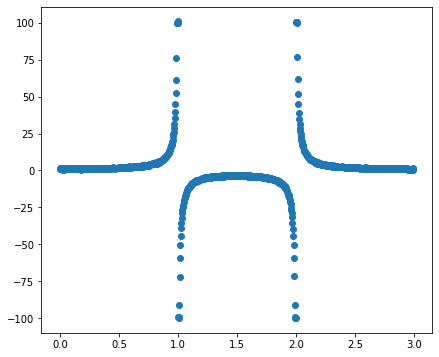

In [27]:
plt.figure(figsize = (7, 6))
plt.scatter(xk, yk)


In [32]:
options = {'xatol': 1e-3, 'disp': True}
x0 = np.array([0, 0, 0, 0])
f = rational
res_rational_nm = minimize(MSE, x0, method='Nelder-Mead',
               options=options)
print(res_rational_nm.x)

[ -18.78204409  -62.03198975   58.97768854 1269.39154233]


In [33]:
x = list(range(-1000, 1000))
a, b, c, d =res_rational_nm.x
y1 = list(map(lambda e: rational(e, a, b, c, d), xk))
print(res_rational_nm)

 final_simplex: (array([[ -18.78204409,  -62.03198975,   58.97768854, 1269.39154233],
       [ -15.9378959 ,  -54.02498694,   53.93525075, 1077.31842937],
       [ -19.11694328,  -91.67289133,   43.43846204,  881.32514865],
       [ -16.64005483,  -81.72175922,   38.05940262,  747.49412176],
       [ -18.79853137, -105.57813279,   54.16450076, 1047.2705947 ]]), array([266808.7670416 , 266809.26780467, 266811.77783955, 266814.24080766,
       266814.90750354]))
           fun: 266808.76704159915
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 801
           nit: 488
        status: 1
       success: False
             x: array([ -18.78204409,  -62.03198975,   58.97768854, 1269.39154233])


Text(0.5, 1.0, 'Nelder-Mead approximation')

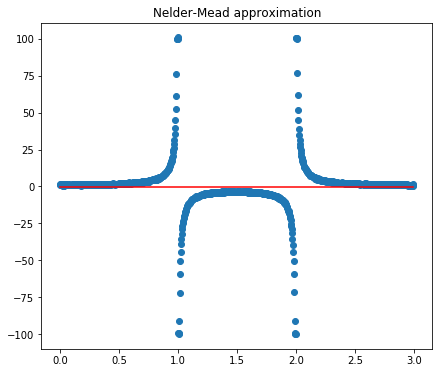

In [34]:
plt.figure(figsize = (7, 6))

plt.scatter(xk, yk)
plt.plot(xk, y1, color='r')
plt.title('Nelder-Mead approximation')

In [35]:
from scipy import optimize
x0 = [1,2,2,1]
fprime = lambda x: optimize.approx_fprime(x, MSE, 0.01)
#res_linear_lm = optimize.least_squares(f_rational, x0, method='lm', args =x0)
res_linear_lm, _ = optimize.curve_fit(f_rational, x, y, method = 'lm')
print(res_linear_lm)

ValueError: operands could not be broadcast together with shapes (2000,) (1001,) 

In [36]:
x = list(range(-1000, 1000))
a, b, c, d =res_linear_lm
y2 = list(map(lambda e: rational(e, a, b, c, d), xk))

Text(0.5, 1.0, 'Levenberg-Marquardt approxiation')

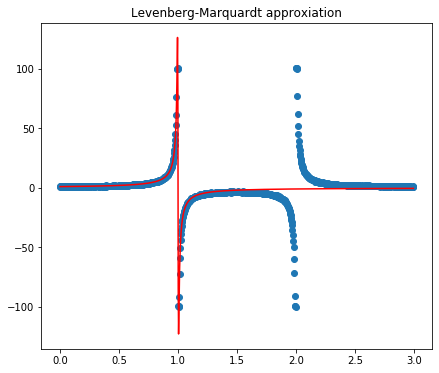

In [37]:
plt.figure(figsize = (7, 6))
plt.scatter(xk, yk)
plt.plot(xk, y2, color='r')
plt.title("Levenberg-Marquardt approxiation")

In [42]:
bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
res3 = optimize.differential_evolution(MSE, bounds=bounds)

print('differential_evolution', res3)


differential_evolution      fun: 137070.14084597692
     jac: array([ -5006.42345287,   8084.76761449, 957982.27703199,  -3968.27817895])
 message: 'Optimization terminated successfully.'
    nfev: 1150
     nit: 6
 success: True
       x: array([-1.13026319,  1.13057787, -2.        ,  1.00002128])


Text(0.5, 1.0, 'Differential evolution aproximation')

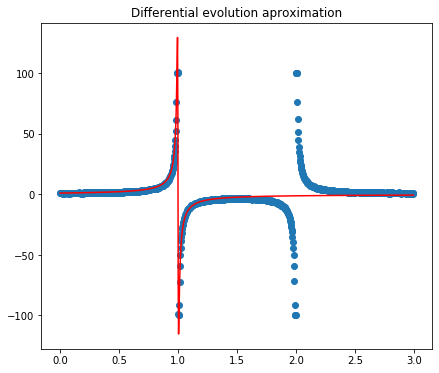

In [43]:
plt.figure(figsize = (7, 6))

x = list(range(-1000, 1000))
a, b, c, d = res3.x
y3 = list(map(lambda e: rational(e, a, b, c, d), xk))

plt.scatter(xk, yk)
plt.plot(xk, y3, color='r')
plt.title('Differential evolution aproximation')

In [44]:
bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
res4 = optimize.dual_annealing(MSE, bounds=bounds, seed=1234)
print('annealing', res4)

annealing      fun: 136211.04228843283
 message: ['Maximum number of iteration reached']
    nfev: 9181
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-1.00313346,  1.00340306, -2.        ,  1.00001625])


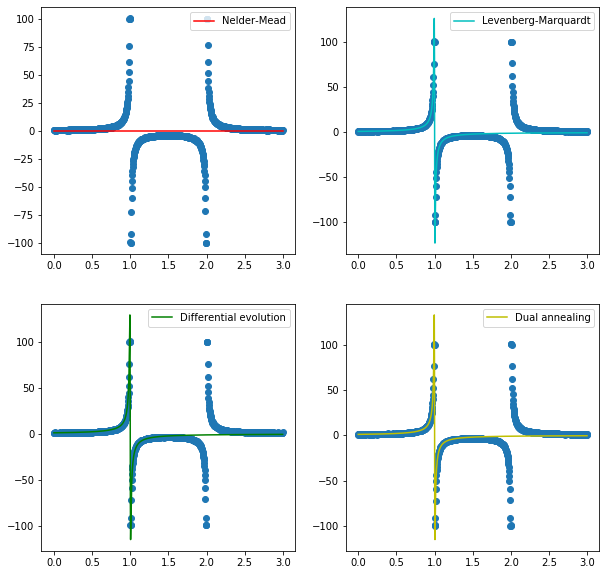

In [45]:
x = list(range(-1000, 1000))
a, b, c, d = res4.x
y4 = list(map(lambda e: rational(e, a, b, c, d), xk))
plt.figure(figsize = (10, 10))

plt.subplot(2,2,1)
plt.scatter(xk, yk)
plt.plot(xk, y1, color='r', label = 'Nelder-Mead')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(xk, yk)
plt.plot(xk, y2, color='c', label = 'Levenberg-Marquardt')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(xk, yk)
plt.plot(xk, y3, color='g', label = 'Differential evolution')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(xk, yk)
plt.plot(xk, y4, color='y', label = 'Dual annealing')
plt.legend()

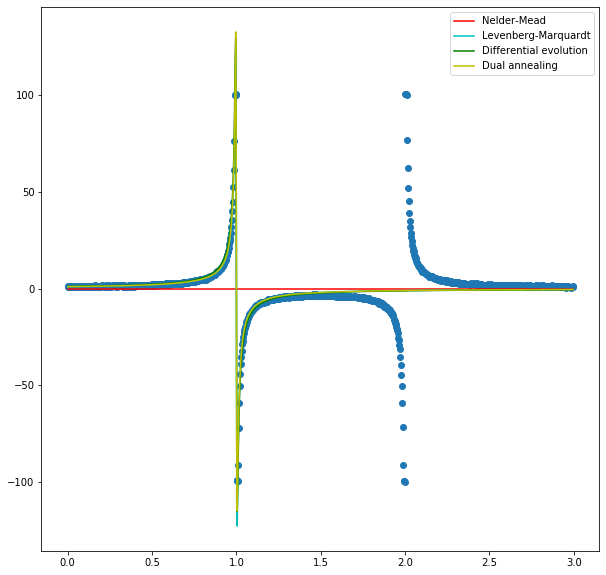

In [46]:
x = list(range(-1000, 1000))
a, b, c, d = res4.x
y4 = list(map(lambda e: rational(e, a, b, c, d), xk))
plt.figure(figsize = (10, 10))


plt.scatter(xk, yk)
plt.plot(xk, y1, color='r', label = 'Nelder-Mead')


plt.plot(xk, y2, color='c', label = 'Levenberg-Marquardt')


plt.plot(xk, y3, color='g', label = 'Differential evolution')


plt.plot(xk, y4, color='y', label = 'Dual annealing')
plt.legend()

plt.show()

In [1]:
from scipy.optimize import dual_annealing

In [54]:
!pip install scipy==1.5.2

  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\users\\zoya\\anaconda3\\lib\\site-packages\\~cipy\\integrate\\lsoda.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



[1.26964621e-10 1.00850083e-10 1.00000000e-10 1.13486976e-10] [[ 7.81623641e-03 -2.60871619e-05  4.32899187e-08 -3.88387939e-03]
 [-2.60871619e-05  1.07185650e-07 -1.62674902e-10  1.59578930e-05]
 [ 4.32899187e-08 -1.62674902e-10  2.56210089e-13 -2.42191812e-08]
 [-3.88387939e-03  1.59578930e-05 -2.42191812e-08  2.37582500e-03]]


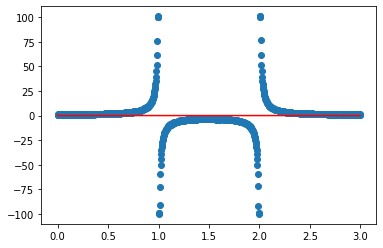

In [25]:
from scipy.optimize import curve_fit

p0 = [0,0,0,0]
popt, pcov = curve_fit(rational, p0 = p0,  xdata = xk, ydata= yk,maxfev=50000, bounds = (0,1))

print(popt, pcov )
a, b, c, d =popt
y1 = list(map(lambda e: rational(e, a, b, c, d), xk))

plt.scatter(xk,yk)
plt.plot(xk,y1, color = 'r')

In [13]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N).  If None, then the
        init